In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from tensorflow.keras.datasets import mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
#train data shape, test data shape
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

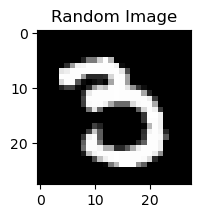

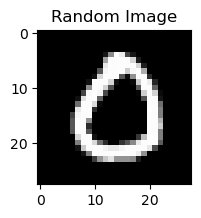

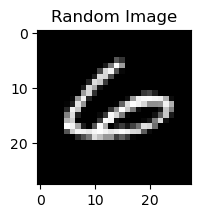

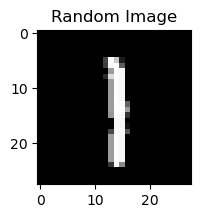

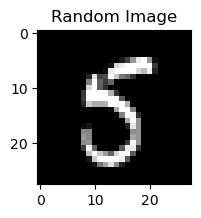

In [5]:
import cv2
import matplotlib.pyplot as plt

def imshow(title, image, size):
    h, w = image.shape[:2]
    aspect_ratio = w / h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 
    plt.title(title)
    plt.show()
for i in range(5):
    rn_no = np.random.randint(0, len(x_train))
    img = x_train[rn_no]
    imshow('Random Image', img, size=2)

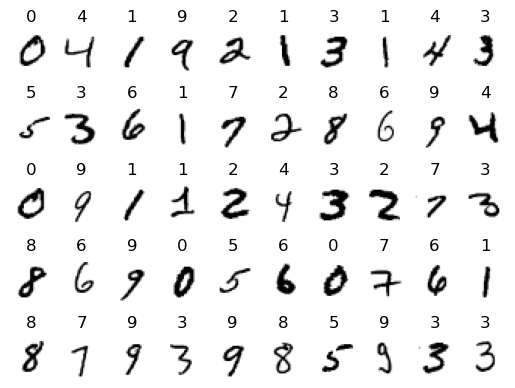

In [6]:
for i in range(1,51):
    plt.subplot(5,10,i).set_title(f'{y_train[i]}')
    plt.axis(False)
    plt.imshow(x_train[i],cmap = 'gray_r')

PREPROCESSING THE DATA

In [7]:
img_rows = x_train.shape[1]
img_cols = x_train.shape[2]

x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

input_shape = (img_rows,img_cols,1)

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255

In [9]:
y_train.shape,y_test.shape

((60000,), (10000,))

In [10]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
num_pixels = x_train.shape[0]*x_train.shape[1]

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import SGD 

model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu', input_shape = input_shape))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(num_classes,activation = 'softmax'))
          
model.compile(loss = 'categorical_crossentropy',optimizer = SGD(0.001),metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [12]:
batch_size = 128
epochs = 25

history = model.fit(x_train,y_train,batch_size = batch_size,epochs = epochs,verbose = 1,validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
469/469 [==============================] - 12s 8ms/step - loss: 2.2761 - accuracy: 0.2519 - val_loss: 2.2376 - val_accuracy: 0.4211
Epoch 2/25
469/469 [==============================] - 3s 7ms/step - loss: 2.1463 - accuracy: 0.5401 - val_loss: 1.9769 - val_accuracy: 0.6444
Epoch 3/25
469/469 [==============================] - 3s 7ms/step - loss: 1.4951 - accuracy: 0.7181 - val_loss: 0.9196 - val_accuracy: 0.7992
Epoch 4/25
469/469 [==============================] - 3s 7ms/step - loss: 0.6714 - accuracy: 0.8339 - val_loss: 0.4944 - val_accuracy: 0.8695
Epoch 5/25
469/469 [==============================] - 3s 7ms/step - loss: 0.4572 - accuracy: 0.8742 - val_loss: 0.3912 - val_accuracy: 0.8916
Epoch 6/25
469/469 [==============================] - 4s 8ms/step - loss: 0.3892 - accuracy: 0.8896 - val_loss: 0.3476 - val_accuracy: 0.9019
Epoch 7/25
469/469 [==============================] - 3s 7ms/step - loss: 0.3549 - accuracy: 0.8982 - val_loss: 0.3215 - val_accuracy: 0.9093
Epoch

In [13]:
history_dict = history.history
history_dict

{'loss': [2.2761189937591553,
  2.1462764739990234,
  1.4950776100158691,
  0.6713957786560059,
  0.4571532607078552,
  0.38918355107307434,
  0.35486406087875366,
  0.33264273405075073,
  0.3165408968925476,
  0.3032284080982208,
  0.29177290201187134,
  0.2814009487628937,
  0.271679162979126,
  0.26290231943130493,
  0.2548101246356964,
  0.2471187263727188,
  0.2400307059288025,
  0.23321829736232758,
  0.22697333991527557,
  0.22091573476791382,
  0.2152092009782791,
  0.2098289281129837,
  0.20486673712730408,
  0.19976645708084106,
  0.19508513808250427],
 'accuracy': [0.25191667675971985,
  0.540149986743927,
  0.7180500030517578,
  0.8339166641235352,
  0.8742166757583618,
  0.8895666599273682,
  0.8982166647911072,
  0.9035166501998901,
  0.9079166650772095,
  0.9114166498184204,
  0.9143833518028259,
  0.9177666902542114,
  0.9205166697502136,
  0.9235333204269409,
  0.9252166748046875,
  0.9280333518981934,
  0.9297500252723694,
  0.9321500062942505,
  0.9337499737739563,
 

In [14]:
model.save("mnist_simple_cnn_10_Epochs.h5")
print("Model Saved")

Model Saved


In [20]:
print(x_test.shape)

pred = np.argmax(model.predict(x_test), axis=-1)

print(pred)

(10000, 28, 28, 1)
313/313 [==============================] - 1s 2ms/step
[7 2 1 ... 4 5 6]


1/1 [==============================] - 0s 20ms/step


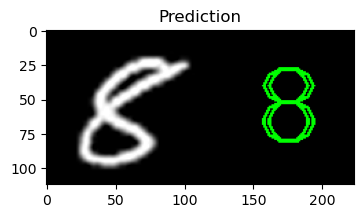

1/1 [==============================] - 0s 26ms/step


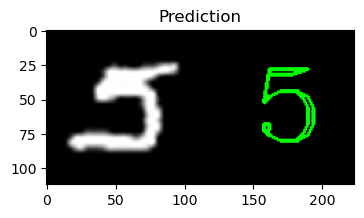

1/1 [==============================] - 0s 20ms/step


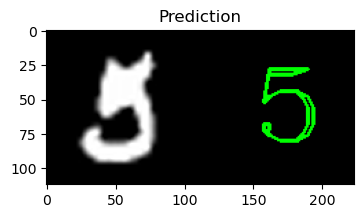

1/1 [==============================] - 0s 22ms/step


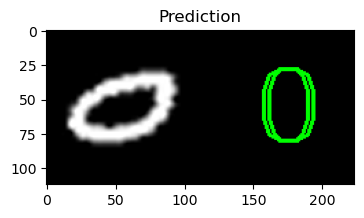

1/1 [==============================] - 0s 21ms/step


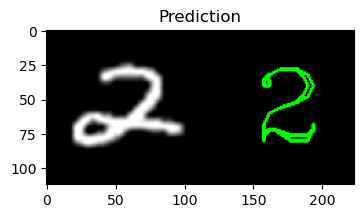

1/1 [==============================] - 0s 21ms/step


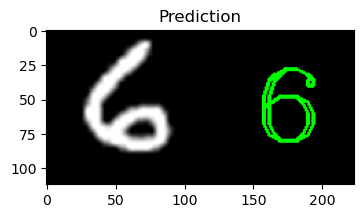

1/1 [==============================] - 0s 21ms/step


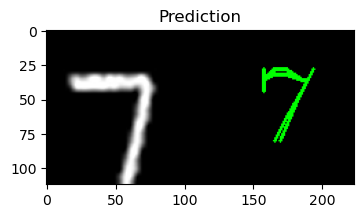

1/1 [==============================] - 0s 19ms/step


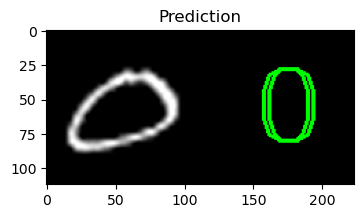

1/1 [==============================] - 0s 19ms/step


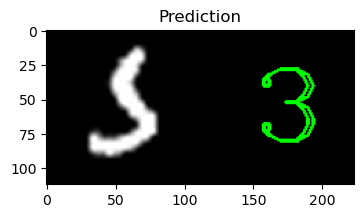

1/1 [==============================] - 0s 21ms/step


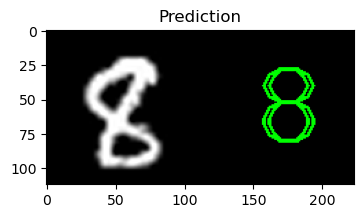

In [25]:
import cv2
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

def draw_test(name, pred, input_im):  
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (150, 80) , cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0,255,0), 2)
    imshow(name, expanded_image,2)

for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1) 
    res = str(np.argmax(model.predict(input_im), axis=-1)[0])
    draw_test("Prediction", res,  np.uint8(imageL)) 